- **Name : Pooja Gautam**
- Mail_Id: pujuu72103@gmail.com 

# Question 1
Use the dataset, lemonade.csv  and perform the following analysis:
- A)	Show average sales
- B)	Show the records whose sales are lower than average. 
- C)	Find the correlation between the variables in the dataset and plot them
- D)	Select the suitable machine learning algorithm for predicting sales


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/monalisapatra26/Data-files/main/lemonade.csv"
data = pd.read_csv(url)
data.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [ ]:
data.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,60.731233,0.826603,40.284932,0.5,25.323288
std,16.196266,0.273171,13.178651,0.0,6.893589
min,15.100000,0.470000,9.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.300000,0.910000,49.000000,0.5,30.000000
max,102.900000,2.500000,80.000000,0.5,43.000000


In [ ]:

#Average of sales 
no_of_sales = data['Sales'].count()
sum_of_sales = data['Sales'].sum()
avg = sum_of_sales/no_of_sales
avg


25.323287671232876

In [ ]:
# using inbuilt mean()
avg_of_sales = data['Sales'].mean()
avg_of_sales


25.323287671232876

In [ ]:
# Records that have less sale than average sales
lower_sales = data[(data['Sales']<avg_of_sales)]
lower_sales

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [ ]:
data.isnull().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

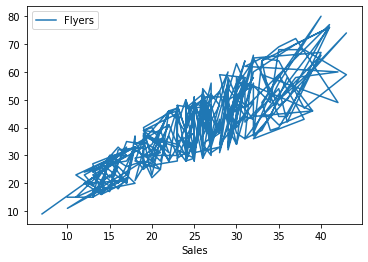

In [ ]:
data.plot('Sales','Flyers')

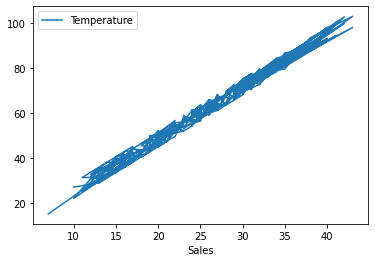

In [ ]:
data.plot('Sales','Temperature')

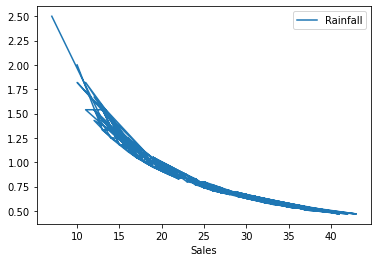

In [ ]:
data.plot('Sales','Rainfall')

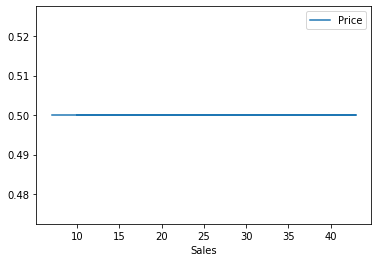

In [ ]:
# data.plot('Sales','Price') not suuitable for sales prediction

In [ ]:
data.drop(['Price'],axis=1,inplace=True)

             Temperature  Rainfall    Flyers     Sales
Temperature     1.000000 -0.902859  0.797719  0.989832
Rainfall       -0.902859  1.000000 -0.747389 -0.909214
Flyers          0.797719 -0.747389  1.000000  0.805183
Sales           0.989832 -0.909214  0.805183  1.000000


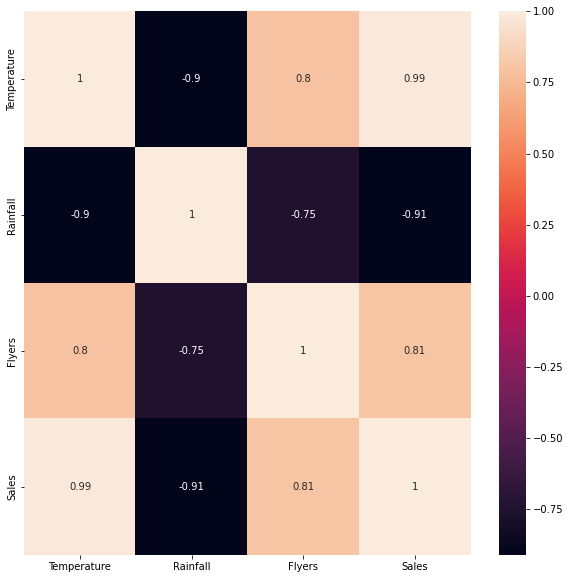

In [ ]:
# correlation between the variables in the dataset and plot them
plt.figure(figsize=(10,10))
cr = data.corr()
sns.heatmap(cr, annot=True, )
print(cr)

In [ ]:
# prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


In [ ]:
x = data['Flyers']
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
x_train.head()

204    69
327    46
38     31
100    34
207    74
Name: Flyers, dtype: int64

In [ ]:
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)


LinearRegression()

In [ ]:
print('Intercept',regr.intercept_)

Intercept 8.11287665764727


In [ ]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

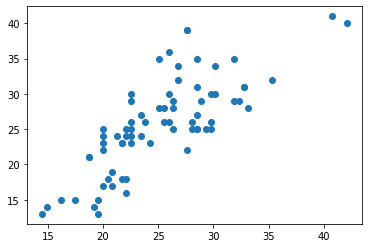

In [ ]:
plt.scatter(preds, y_test)

In [ ]:
y_test.head()

300    25
296    25
213    31
317    23
66     25
Name: Sales, dtype: int64

In [ ]:
preds

array([19.99839476, 28.48805054, 28.48805054, 19.99839476, 26.3656366 ,
       28.48805054, 26.3656366 , 14.4801185 , 25.09218823, 30.1859817 ,
       21.69632591, 23.39425707, 32.30839565, 24.24322265, 28.06356775,
       31.88391286, 20.84736034, 18.72494639, 32.73287844, 26.79011939,
       23.39425707, 25.51667102, 42.0714998 , 30.1859817 , 18.72494639,
       14.90460129, 19.99839476, 22.54529149, 21.27184313, 31.88391286,
       23.81873986, 22.54529149, 32.73287844, 26.79011939, 19.57391197,
       20.84736034, 22.54529149, 25.94115381, 19.99839476, 29.76149891,
       21.69632591, 33.15736123, 17.45149802, 25.09218823, 25.94115381,
       27.63908496, 26.3656366 , 19.14942918, 40.79805143, 22.54529149,
       29.76149891, 22.54529149, 35.27977517, 28.91253333, 27.63908496,
       20.42287755, 21.69632591, 25.51667102, 28.48805054, 16.17804965,
       19.99839476, 19.57391197, 29.76149891, 22.1208087 , 27.63908496,
       28.06356775, 25.94115381, 22.1208087 , 28.48805054, 22.54

In [ ]:
residuals = preds - y_test
residuals

300   -5.001605
296    3.488051
213   -2.511949
317   -3.001605
66     1.365637
         ...   
164   -6.511949
322   -0.454709
90    -2.879191
75     4.337016
78    -1.879191
Name: Sales, Length: 73, dtype: float64

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

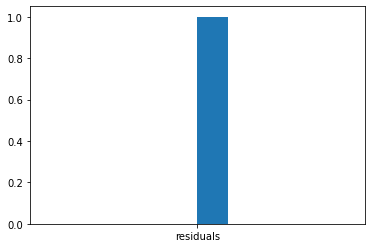

In [ ]:
plt.hist('residuals')

In [ ]:
mean_squared_error(y_test, preds) ** 0.5

4.176849551523249

In [ ]:
regr.score(np.array(x_test).reshape(-1,1),y_test)

0.5953809923479643

# Question 2
 Create a Pivot table with multiple indexes from a given excel sheet (Sales.xlsx). You can also use the Groupby method whenever required
- A. Find the total sale amount region wise, manager wise, sales man wise. 
- B. Find the item wise unit sold and the region wise total sale. 
- C. Count the manager wise sale and mean value of sale amount and also display the sum of all sale amount at the bottom
- D. Find the total sale amount region wise, manager wise, sales man wise where Manager = "Timothy"


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()


Saving SaleData.xlsx to SaleData.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('SaleData.xlsx')
df


,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.00,1198.000,113810.00
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.00,500.000,25000.00
2,2018-02-09,Central,Hermann,Luis,Television,36.00,1198.000,43128.00
3,2018-02-26,Central,Timothy,David,Cell Phone,27.00,225.000,6075.00
4,2018-03-15,West,Timothy,Stephen,Television,56.00,1198.000,67088.00
5,2018-04-01,East,Martha,Alexander,Home Theater,60.00,500.000,30000.00
6,2018-04-18,Central,Martha,Steven,Television,75.00,1198.000,89850.00
7,2018-05-05,Central,Hermann,Luis,Television,90.00,1198.000,107820.00
8,2018-05-22,West,Douglas,Michael,Television,32.00,1198.000,38336.00
9,2018-06-08,East,Martha,Alexander,Home Theater,60.00,500.000,30000.00


In [ ]:
df.describe()

,Units,Unit_price,Sale_amt
count,45.000000,45.000000,45.000000
mean,54.083333,583.313889,30578.761111
std,45.096676,444.806622,32227.534943
min,2.000000,58.500000,250.000000
25%,28.000000,225.000000,4329.000000
50%,53.000000,500.000000,17100.000000
75%,75.000000,1198.000000,43128.000000
max,278.000000,1198.000000,113810.000000


In [ ]:
# A. Find the total sale amount region wise, manager wise, sales man wise.
print(pd.pivot_table(df,index=["Region","Manager","SalesMan"], values="Sale_amt", aggfunc=np.sum))

                           Sale_amt
Region  Manager SalesMan           
Central Douglas John       124016.0
        Hermann Luis       206373.0
                Shelli      33698.0
                Sigal      125037.5
        Martha  Steven     199690.0
        Timothy David      140955.0
East    Douglas Karen       48204.0
        Martha  Alexander  236703.0
                Diana       36100.0
West    Douglas Michael     66836.0
        Timothy Stephen     88063.0


In [ ]:
# B. Find the item wise unit sold and the region wise total sale.
print(pd.pivot_table(df,index=["Region", "Item"], values="Units", aggfunc=np.sum))

                      Units
Region  Item               
Central Cell Phone     27.0
        Desk            7.0
        Home Theater  424.0
        Television    498.0
        Video Games   243.0
East    Cell Phone    175.0
        Home Theater  234.0
        Television    130.0
        Video Games   152.0
West    Cell Phone     76.0
        Desk            3.0
        Home Theater   64.0
        Television     88.0


In [ ]:
# C. Count the manager wise sale and mean value of sale amount and also display the sum of all sale amount at the bottom

table = pd.pivot_table(df,index=["Manager","SalesMan"],values=["Units","Sale_amt"],
               aggfunc=[np.sum],fill_value=0,margins=True)
print(table)

                         sum      
                    Sale_amt Units
Manager SalesMan                  
Douglas John        124016.0   156
        Karen        48204.0   170
        Michael      66836.0    89
Hermann Luis        206373.0   281
        Shelli       33698.0   193
        Sigal       125037.5   173
Martha  Alexander   236703.0   396
        Diana        36100.0   125
        Steven      199690.0   183
Timothy David       140955.0   213
        Stephen      88063.0   142
All                1305675.5  2121


In [ ]:
# D. Find the total sale amount region wise, manager wise, sales man wise where Manager = "Timothy"
table = pd.pivot_table(df,index=["Region","Manager","SalesMan"], values="Sale_amt")
print(table.query('Manager == ["Timothy"]'))

                          Sale_amt
Region  Manager SalesMan          
Central Timothy David     28191.00
West    Timothy Stephen   22015.75


# Question 3
- A)Write a Python code to create a pie chart with a title of the popularity of programming Languages. Make multiple wedges of the pie.

    Sample data:
    Programming languages: Java, Python, C++, PHP, JavaScript, C#, 
    Popularity: 17.6, 22.2, 7.7, 8.8, 8, 6.7


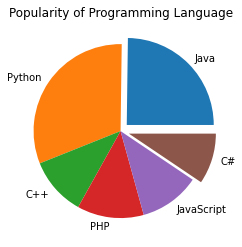

In [ ]:

Programming_languages= ['Java', 'Python', 'C++' ,'PHP', 'JavaScript', 'C#']
Popularity = [17.6, 22.2, 7.7, 8.8, 8, 6.7]
explode = (0.1, 0, 0, 0, 0, .1) 
plt.pie(Popularity, explode=explode, labels=Programming_languages)
plt.title("Popularity of Programming Language")
plt.show()



- B)Consider Company Sales Data
  month_number=[1,2,3,4,5,6,7,8,9,10,11,12]

  facecream = [2500,2630,2140,3400,3600,2760,2980,3700,3540,1990,2340,2900]
  
  facewash = [1500,1200,1340,1130,1740,1555,1120,1400,1780,1890,2100,1760]

  toothpaste=[5200,5100,4550,5870,4560,4890,4780,5860,6100,8300,7300,7400]

  bathingshop=[9200,6100,9550,8870,7760,7490,8980,9960,8100,10300,13300,14400]

  shampoo=[1200,2100,3550,1870,1560,1890,1780,2860,2100,2300,2400,1800]

  moisturizer=[1500,1200,1340,1130,1740,1555,1120,1400,1780,1890,2100,1760]

  total_units=[21100,18330,22470,22270,20960,20140,29550,36140,23400,26670,41280,30020]

  total_profit=[211000,183300,224700,222700,209600,201400,295500,361400,234000,266700,412800,300200]


  - a)	Plot total profit of all months using line plot with the following Style properties:  
        1) Line Style dotted and Line-color should be red 
        2) Show legend at the lower right location. 
        3) X label name = Month Number 
        4) Y label name = Sold units number 
        5) Add a circle marker. 
        6) Line marker color as red 
        7) Line width should be 3
   - b)	Plot face cream and facewash product sales data using the bar chart. The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart
  - c)	Plot the total profit of each month using the histogram to see the most common profit range


In [ ]:
dataframe = pd.DataFrame({
"month_number":[1,2,3,4,5,6,7,8,9,10,11,12],
"facecream":[2500,2630,2140,3400,3600,2760,2980,3700,3540,1990,2340,2900],
"facewash" : [1500,1200,1340,1130,1740,1555,1120,1400,1780,1890,2100,1760],
"toothpaste":[5200,5100,4550,5870,4560,4890,4780,5860,6100,8300,7300,7400],
"bathingshop":[9200,6100,9550,8870,7760,7490,8980,9960,8100,10300,13300,14400],
"shampoo":[1200,2100,3550,1870,1560,1890,1780,2860,2100,2300,2400,1800],
"moisturizer":[1500,1200,1340,1130,1740,1555,1120,1400,1780,1890,2100,1760],
"total_units":[21100,18330,22470,22270,20960,20140,29550,36140,23400,26670,41280,30020],
"total_profit":[211000,183300,224700,222700,209600,201400,295500,361400,234000,266700,412800,300200]})


In [ ]:
dataframe

,month_number,facecream,facewash,toothpaste,bathingshop,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


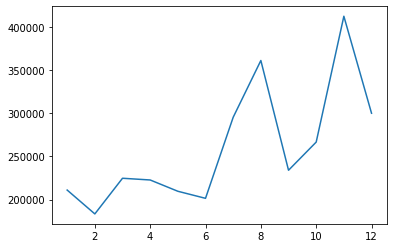

In [ ]:
plt.plot('month_number','total_profit', data=dataframe)

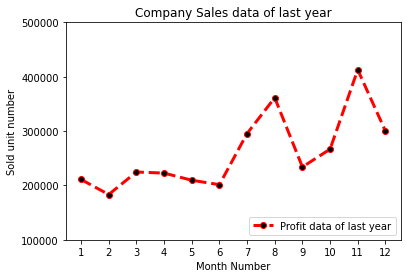

In [ ]:
profitList = dataframe['total_profit'].tolist()
monthList  = dataframe['month_number'].tolist()

plt.plot(monthList, profitList, label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=3)
      
plt.xlabel('Month Number')
plt.ylabel('Sold unit number')
plt.legend(loc='lower right')
plt.title('Company Sales data of last year')
plt.xticks(monthList)
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()

In [ ]:
print(dataframe.columns.tolist())

['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingshop', 'shampoo', 'moisturizer', 'total_units', 'total_profit']


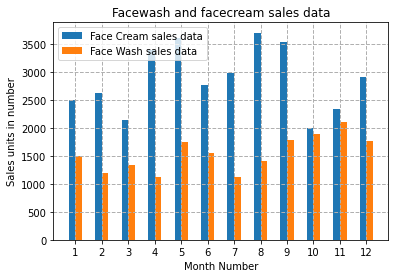

In [ ]:
monthList  = dataframe['month_number'].tolist()
faceWashSalesData   = dataframe['facewash'].tolist()
faceCremSalesData   = dataframe['facecream'].tolist()


plt.bar([a-0.25 for a in monthList], faceCremSalesData, width= 0.25, label = 'Face Cream sales data', align='edge')
plt.bar([a+0.25 for a in monthList], faceWashSalesData, width= -0.25, label = 'Face Wash sales data', align='edge')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.title(' Sales data')

plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Facewash and facecream sales data')
plt.show()

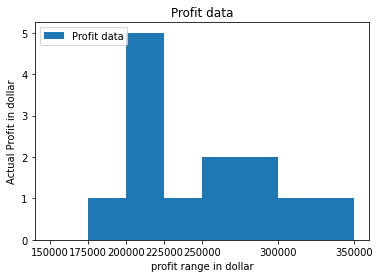

In [ ]:
profitList = dataframe['total_profit'].tolist()
labels = ['low', 'average', 'Good', 'Best']
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
plt.hist(profitList, profit_range, label = 'Profit data')
plt.xlabel('profit range in dollar')
plt.ylabel('Actual Profit in dollar')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')
plt.show()

# Question 6
 Write a Pandas program 
- a) to identify the column(s) of a given DataFrame which have at least one missing value. 
- b) count the number of missing values in each column of a given DataFrame
- c) drop the rows where at least one element is missing in a given DataFrame
Test Data:

    ord_no  purch_amt    ord_date  customer_id  salesman_id
0   80001.0     250.50     2017-10-05         2002       5002.0
1       NaN       170.65      2017-09-10        2001       5003.0
2   80002.0      55.26         NaN                 2001       5001.0
3   80004.0     160.50     2017-08-17         2003          NaN
4       NaN     978.50       2017-09-10         2002       5002.0
5   80005.0    2800.60    2017-07-27         2001       5001.0
6       NaN    5860.00      2017-09-10         2001       5001.0
7   80010.0    1883.43    2017-10-10         2004          NaN
8   80003.0    2580.40    2017-10-10         2003       5003.0
9   80012.0     150.45     2017-06-27         2002       5002.0
10      NaN      65.29       2017-08-17         2001       5003.0
11  80013.0    3145.60    2017-04-25        2001          NaN


In [ ]:
# a-part
# import pandas as pd
# import numpy as np
pd.set_option('display.max_rows', None)

df = pd.DataFrame({
'ord_no':[80001,np.nan,80002,80004,np.nan,80005,np.nan,80010,80003,80012,np.nan,80013],
'purch_amt':[250.5,170.65,55.26,160.5,978.5,2800.6,5860,1883.43,2580.4,150.45, 65.29,3145.6],
'ord_date': ['2017-10-05','2017-09-10',np.nan,'2017-08-17','2017-09-10','2017-07-27','2017-09-10','2017-10-10','2017-10-10','2017-06-27','2017-08-17','2017-04-25'],
'customer_id':[2002,2001,2001,2003,2002,2001,2001,2004,2003,2002,2001,2001],
'salesman_id':[5002,5003,5001,np.nan,5002,5001,5001,np.nan,5003,5002,5003,np.nan]})
print("Original Orders DataFrame:")
print(df)
print("\nIdentify the columns which have at least one missing value:")
print(df.isna().any())

Original Orders DataFrame:
     ord_no  purch_amt    ord_date  customer_id  salesman_id
0   80001.0     250.50  2017-10-05         2002       5002.0
1       NaN     170.65  2017-09-10         2001       5003.0
2   80002.0      55.26         NaN         2001       5001.0
3   80004.0     160.50  2017-08-17         2003          NaN
4       NaN     978.50  2017-09-10         2002       5002.0
5   80005.0    2800.60  2017-07-27         2001       5001.0
6       NaN    5860.00  2017-09-10         2001       5001.0
7   80010.0    1883.43  2017-10-10         2004          NaN
8   80003.0    2580.40  2017-10-10         2003       5003.0
9   80012.0     150.45  2017-06-27         2002       5002.0
10      NaN      65.29  2017-08-17         2001       5003.0
11  80013.0    3145.60  2017-04-25         2001          NaN

Identify the columns which have at least one missing value:
ord_no          True
purch_amt      False
ord_date        True
customer_id    False
salesman_id     True
dtype: bool


In [ ]:
# count the number of missing values in each column 
print(df.isna().sum())

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64


In [ ]:
# drop the rows where at least one element is missing
df.dropna()  


,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,80001.0,250.50,2017-10-05,2002,5002.0
5,80005.0,2800.60,2017-07-27,2001,5001.0
8,80003.0,2580.40,2017-10-10,2003,5003.0
9,80012.0,150.45,2017-06-27,2002,5002.0


# Question 7
- The sales of a company (in million dollars) for each year are shown in the table below.

    x (year)	2005	2006	2007	2008	2009
    y (sales)	12	19	29	37	45

    Use Linear Regression model to predict the sales for the year 2011


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

data = pd.DataFrame({
    'year' : ['2005', '2006', '2007', '2008', '2009'],
    'sales': [12,19,29,37,45]
})


In [ ]:

x= data['year']
y=data['sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
x_train.head()


4    2009
0    2005
3    2008
1    2006
Name: year, dtype: object

In [ ]:
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [ ]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(x_test)




array([['2007']], dtype=object)

In [ ]:
x_test = [['2011']]
sales_2011 = regr.predict(x_test)
print('Sales of year 2011 : ',sales_2011)

Sales of year 2011 :  [[61.85]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# Question 8
- Using a simple dataset for e.g. diabetes.csv, train a classifier to distinguish between diabetic and non-diabetic.
The purpose of this work is to identify the machine learning algorithm that is best-suited for the problem at hand; thus, we want to compare different algorithms, selecting the best-performing one.
Use Classification Build Models and list the accuracy for each case
  - a.	Logistic Regression
  - b.	Decision Tree
  - c.	K-Nearest Neighbors  
  - d.	Gaussian Naive Bayes
  - e.	Support Vector Machine
  Example Output: 
  Accuracy of Decision Tree classifier on training set: 1.00
  Accuracy of Decision Tree classifier on test set: 0.73


In [ ]:
#import library
import seaborn as sns

sns.set()

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df_copy = df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


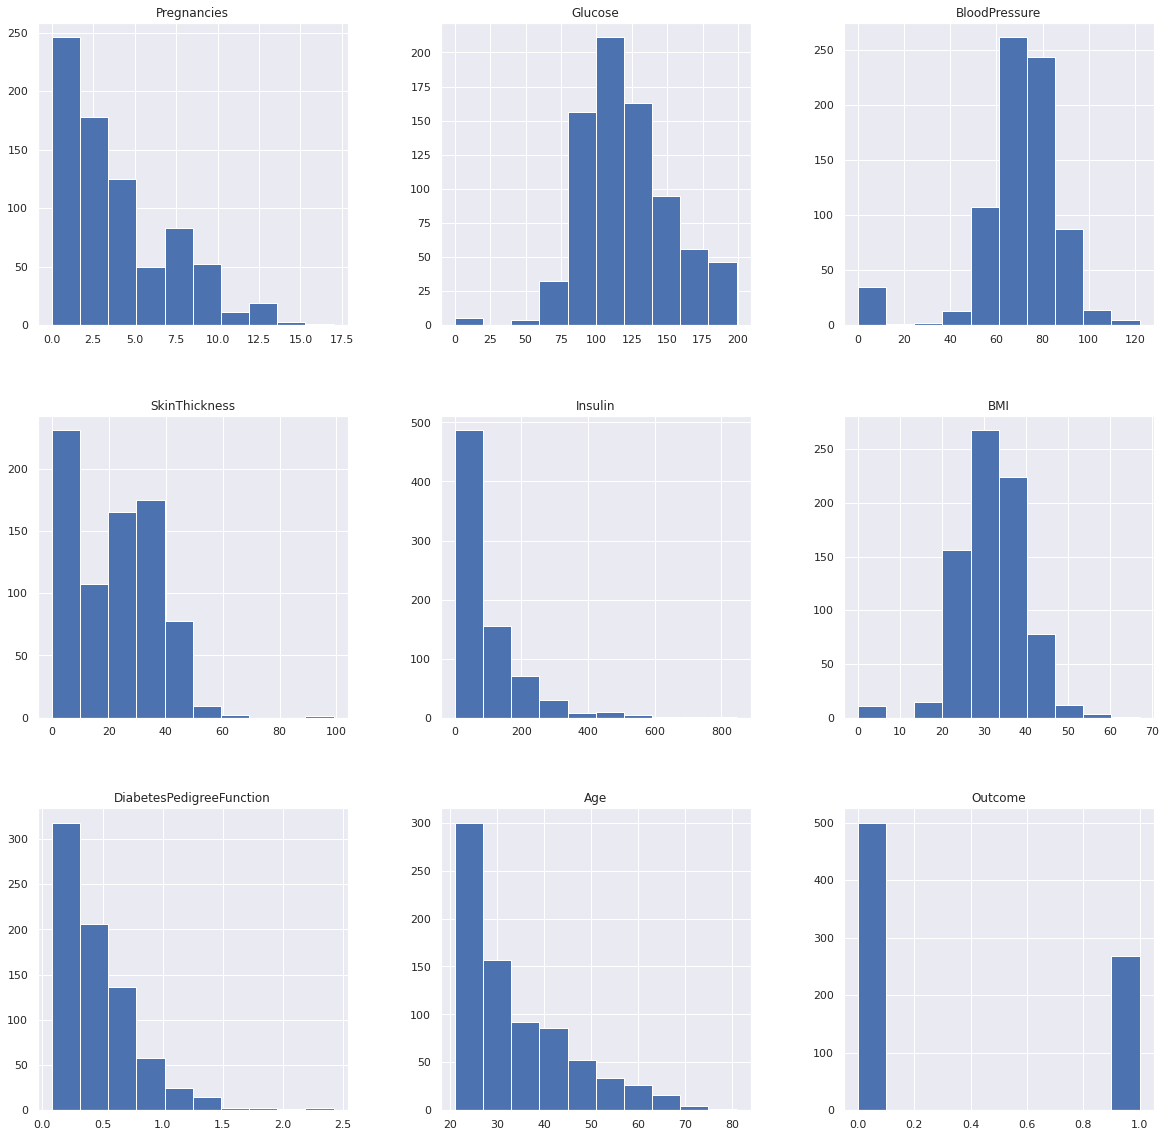

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
#replace null values with mean and median
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

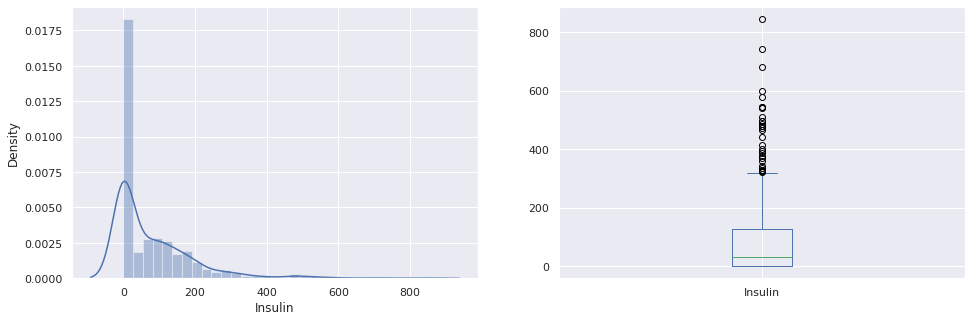

In [ ]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

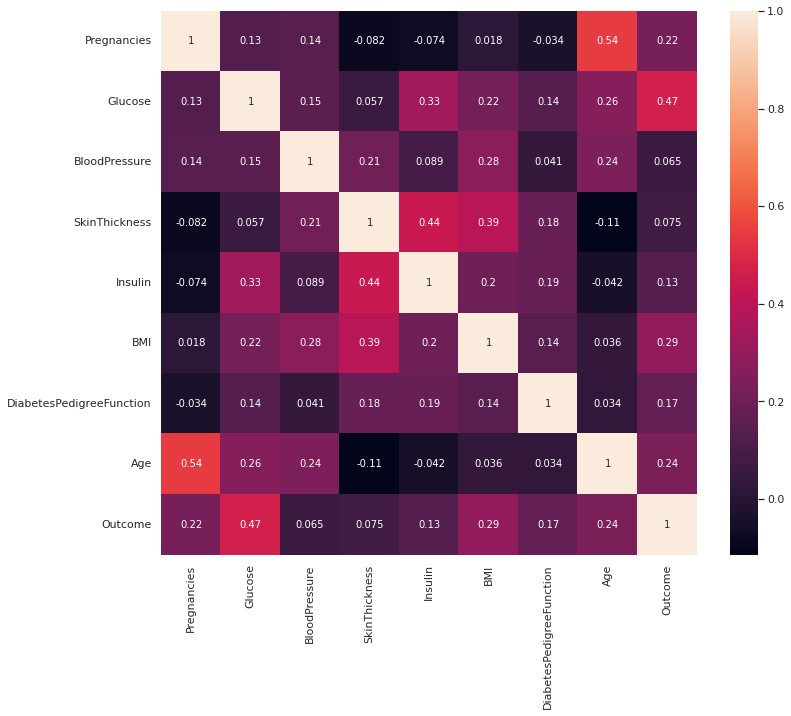

In [ ]:
#correlation
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True)

In [ ]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     0
42     0
43     1
44     0
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     1
62     0
63     0
64     1
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
110    1
1

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

**1) Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[142  20]
 [ 34  58]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator = logmodel, X= X_train, y = y_train ,cv=10)
accuracies

array([0.80769231, 0.76923077, 0.82692308, 0.76923077, 0.60784314,
       0.80392157, 0.82352941, 0.78431373, 0.78431373, 0.7254902 ])

**2) Using Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7086614173228346


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[129  33]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.55      0.58        92

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.70      0.71      0.71       254



**3) Using support vector machine(SVM)**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



**5) using KNeighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[129  33]
 [ 45  47]]


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       162
           1       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254



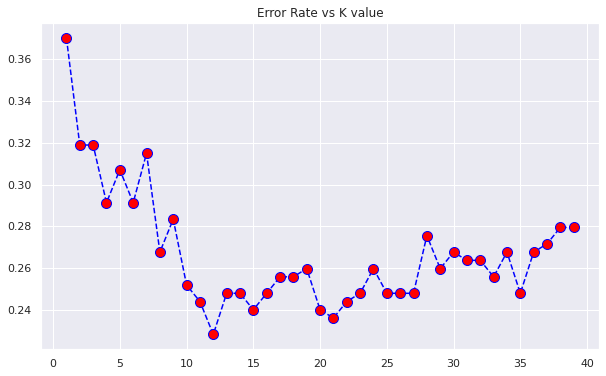

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

# Question 10 
  - a)Write a Python program that prints all the numbers from 10 to 16 except 13 and 16.
  - b)  Write a Python function to calculate the factorial of a number (a non-negative integer). The function accepts the number as an argument 
  - c) Write a Python program to split the text sentence or paragraph into a list of words. After that remove the stop words, remove the punctuations.


In [ ]:
for i in range(10,17):
  if i==13 or i==16:
    continue
  else:
    print(i)

10
11
12
14
15


In [ ]:
def factorial(num):
    if num==0 or num==1:
     return 1
    else:
      return factorial(num-1)*num

number = int(input('Enter a number : '))
fact = factorial(number)
print('Factorial is',fact)
  

  

Enter a number : 6
Factorial is 720


In [ ]:
!pip install nltk

In [ ]:
# Write a Python program to split the text sentence or paragraph into a list of words. After that remove the stop words, remove the punctuations.
stopwords =['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
sentence = input("Enter a sentence : ")
words = sentence.split()
print(words)

Enter a sentence : this is a dummy text for practical purpose of  demonstrating words filtering
['this', 'is', 'a', 'dummy', 'text', 'for', 'practical', 'purpose', 'of', 'demonstrating', 'words', 'filtering']


In [ ]:
lst=[]
for word in words:
  if word not in stopwords:
    lst.append(word)
print(lst)

['dummy', 'text', 'practical', 'purpose', 'demonstrating', 'words', 'filtering']
